In [38]:
# Mandatory imports
%config InlineBackend.figure_format='retina'
from IPython.display import display, HTML

%matplotlib widget
%load_ext autoreload
%autoreload 2

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from astropy.io import fits


from qubic.lib.Qdictionary import qubicDict
from qubic.lib.Instrument.Qinstrument import QubicInstrument
from qubic.lib.Qscene import QubicScene

plt.rcParams['figure.figsize'] = (8,4)

def print_keys(d, keys):
    for key in keys:
        print(' - {:25}: {}'.format(key, d[key]))
    print('\n')




def get_peaks_configuration(config, central_freq, n_nus=11, doplot=False, idet=None):
    dictfilename = 'qubic/qubic/dicts/global_source_oneDet.dict'
    d = qubicDict()
    d.read_from_file(dictfilename)
    d['config'] = config
    if d['config'] == 'TD':
        Ndet = 248
    elif d['config'] == 'FI':
        Ndet = 992
    else:
        print('Wrong config in dict')
        return 0
    
    d['filter_nu']= 150000000000.0
    d['beam_shape'] = 'gaussian'  # can be 'gaussian', 'fitted_beam' or 'multi_freq'  
    d['synthbeam'] = None         # we put nothing
    d['nside'] = 512              # To have nice SB maps
    d['use_synthbeam_fits_file'] = False
    d['synthbeam_fraction'] = 1
    d['synthbeam_kmax'] = 3

    try:
        q_instrument = QubicInstrument(d)
        print('done', config, central_freq)
    except:
        print('oups')
        return 0,0,0,0
    
    
    print(len(q_instrument))
    
    numin = central_freq * (1 - d['filter_relative_bandwidth']/2.)
    numax = central_freq * (1 + d['filter_relative_bandwidth']/2.)
    nus = np.linspace(numin, numax, n_nus)

    thetas = np.zeros((n_nus, Ndet, (2*d['synthbeam_kmax']+1)**2))
    phis = np.zeros((n_nus, Ndet, (2*d['synthbeam_kmax']+1)**2))
    vals = np.zeros((n_nus, Ndet, (2*d['synthbeam_kmax']+1)**2))
    my_sbs = np.zeros((n_nus, 12*d['nside']**2))
    for i in range(n_nus):
        d['filter_nu'] = nus[i] * 1e9
        q_instrument_i = QubicInstrument(d)
        q_scene_i = QubicScene(d)
        thetas[i,:,:], phis[i,:,:], vals[i,:,:] = q_instrument_i._peak_angles(q_scene_i, 
                                                    d['filter_nu'], 
                                                    q_instrument_i.detector.center, 
                                                    q_instrument_i.synthbeam, 
                                                    q_instrument_i.horn, 
                                                    q_instrument_i.primary_beam)
    if doplot:
        d['filter_nu'] = central_freq * 1e9
        q_instrument = QubicInstrument(d)
        q_scene = QubicScene(d)
        if idet is None:
            idet = np.random.randint(248)
        sb = q_instrument.get_synthbeam(q_scene, idet)  
        hp.gnomview(np.log10(sb/np.max(sb)), rot=[0,90], reso=20, min=-5, max=0,
             title='Theory {} {} GHz: TES #{}'.format(d['config'], d['filter_nu']/1e9,idet))
        for i in range(n_nus):
            hp.projscatter(thetas[i, idet,:], phis[i, idet,:], c=vals[i, idet,:]/np.max(vals[i, idet,:]), marker='x', cmap='Reds')

    return thetas, phis, vals, nus, q_instrument


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


JC has modified this part !!!
There is no fits file given in this dictionary. Using analytical model of beam parameters
done TD 150
248
JC has modified this part !!!
There is no fits file given in this dictionary. Using analytical model of beam parameters
JC has modified this part !!!
There is no fits file given in this dictionary. Using analytical model of beam parameters
JC has modified this part !!!
There is no fits file given in this dictionary. Using analytical model of beam parameters
JC has modified this part !!!
There is no fits file given in this dictionary. Using analytical model of beam parameters
JC has modified this part !!!
There is no fits file given in this dictionary. Using analytical model of beam parameters
JC has modified this part !!!
There is no fits file given in this dictionary. Using analytical model of beam parameters
JC has modified this part !!!
There is no fits file given in this dictionary. Using analytical model of beam parameters
JC has modified this par

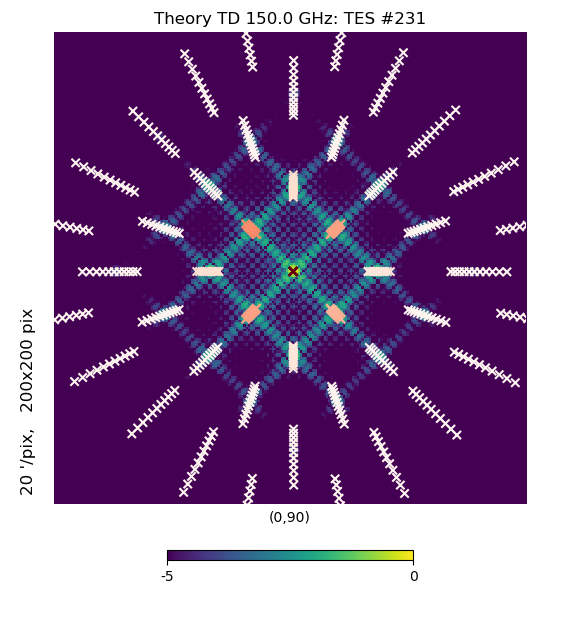

In [39]:
thetas, phis, vals, nus, qi = get_peaks_configuration('TD', 150, n_nus=11, doplot=True, idet=231)
# thetas, phis, vals, nus = get_peaks_configuration('FI', 150, n_nus=11, doplot=True, idet=231)
# thetas, phis, vals, nus = get_peaks_configuration('TD', 220, n_nus=11, doplot=True, idet=231)
# thetas, phis, vals, nus = get_peaks_configuration('FI', 220, n_nus=11, doplot=True, idet=231)




